In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [00:32<00:00, 143MB/s]
100% 2.70G/2.70G [00:32<00:00, 89.8MB/s]


In [5]:
!unzip /content/new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import  ImageDataGenerator,img_to_array,load_img
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

In [7]:
len(os.listdir("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [10]:
train_data=ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)

val_data=ImageDataGenerator(preprocessing_function=preprocess_input)

In [12]:
train=train_data.flow_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                     target_size=(256,256),
                                     batch_size=32)
val=val_data.flow_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                     target_size=(256,256),
                                     batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [13]:
t_img,label=train.next()

In [14]:
t_img.shape

(32, 256, 256, 3)

In [35]:
def plotImage(img_arr,label):
  for im,l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.show()

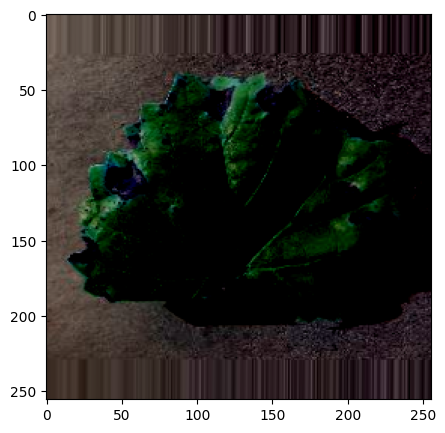

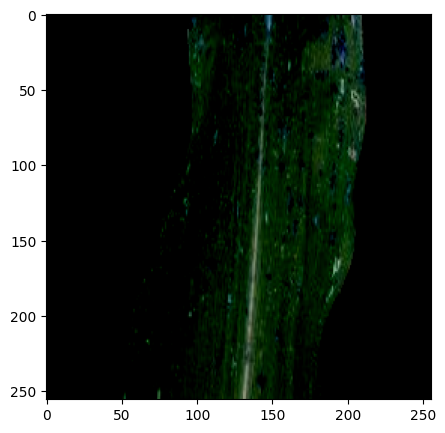

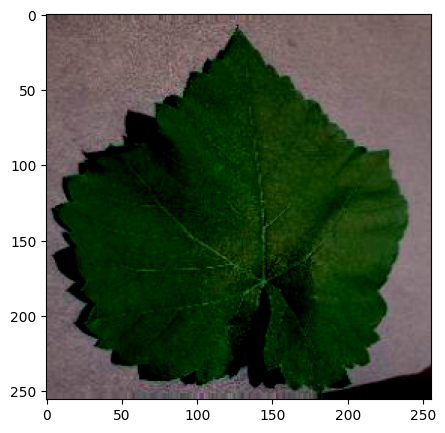

In [27]:
plotImage(t_img[:3],label[:3])


In [32]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [28]:
base_model=VGG19(input_shape=(256,256,3),include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [29]:
for layer in base_model.layers:
  layer.trainable=False

In [30]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [33]:
X=Flatten()(base_model.output)
X=Dense(units=38,activation='softmax')(X)

model=Model(base_model.input,X)

In [34]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [38]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [39]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)
mc=ModelCheckpoint(filepath="best_model.h5",
                   monitor='val_accuracy',
                   min_delta=0.01,
                   patience=3,
                   verbose=1,
                   save_best_only=True)


cb=[es,mc]

In [40]:
his=model.fit_generator(train,
                        steps_per_epoch=16,
                        epochs=50,
                        verbose=1,
                        callbacks=cb,
                        validation_data=val,
                        validation_steps=16)

<ipython-input-40-c8eaa219365e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his=model.fit_generator(train,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 28.2330 - accuracy: 0.1680
Epoch 1: val_accuracy improved from -inf to 0.44141, saving model to best_model.h5
16/16 [==============================] - 29s 890ms/step - loss: 28.2330 - accuracy: 0.1680 - val_loss: 14.1203 - val_accuracy: 0.4414


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 15.6911 - accuracy: 0.3926
Epoch 2: val_accuracy improved from 0.44141 to 0.50195, saving model to best_model.h5
16/16 [==============================] - 15s 914ms/step - loss: 15.6911 - accuracy: 0.3926 - val_loss: 12.0012 - val_accuracy: 0.5020
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 12.3654 - accuracy: 0.5293
Epoch 3: val_accuracy improved from 0.50195 to 0.64453, saving model to best_model.h5
16/16 [==============================] - 14s 900ms/step - loss: 12.3654 - accuracy: 0.5293 - val_loss: 8.4310 - val_accuracy: 0.6445
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 11.0124 - accuracy: 0.5762
Epoch 4: val_accuracy improved from 0.64453 to 0.65625, saving model to best_model.h5
16/16 [==============================] - 16s 992ms/step - loss: 11.0124 - accuracy: 0.5762 - val_loss: 7.8649 - val_accuracy: 0.6562
Epoch 5/50
16/16 [==============================] - ETA: 

In [41]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

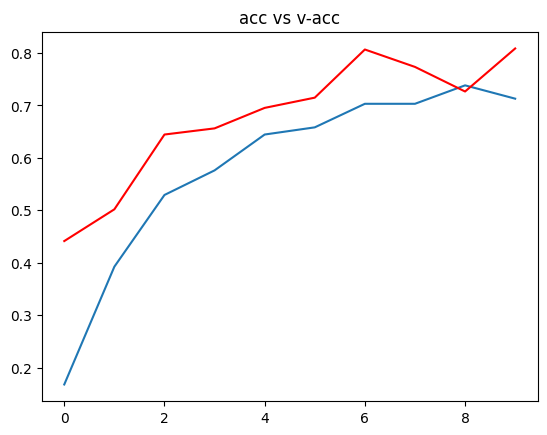

In [42]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title("acc vs v-acc")
plt.show()

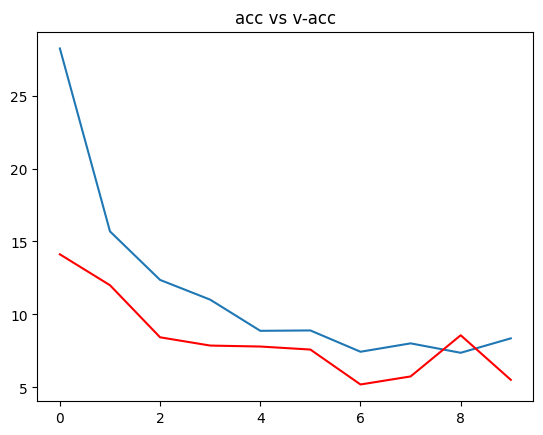

In [43]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title("acc vs v-acc")
plt.show()

In [46]:
from keras.models import load_model
model=load_model("/content/best_model.h5")

In [47]:
acc=model.evaluate_generator(val)[1]
print(f"the accuracy of your model is={acc*100}%")

<ipython-input-47-76abd708d3a1>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc=model.evaluate_generator(val)[1]


the accuracy of your model is=78.28363180160522%


In [69]:
ref=dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))
ref

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [70]:
def prediction(path):
  img=load_img(path,target_size=(256,256))
  i=img_to_array(img)
  im=preprocess_input(i)
  img=np.expand_dims(im,axis=0)
  pred=np.argmax(model.predict(img))
  print(f"the image belongs to {ref[pred]}")

In [71]:
path="/content/test/test/AppleCedarRust4.JPG"
prediction(path)

1/1 [==============================] - 0s 19ms/step
the image belongs to Apple___Cedar_apple_rust


In [72]:
path="/content/test/test/CornCommonRust2.JPG"
prediction(path)

1/1 [==============================] - 0s 19ms/step
the image belongs to Corn_(maize)___Common_rust_


In [74]:
path="/content/test/test/TomatoYellowCurlVirus2.JPG"
prediction(path)

1/1 [==============================] - 0s 19ms/step
the image belongs to Tomato___Tomato_Yellow_Leaf_Curl_Virus
